In [1]:
import sys
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wireplane = "Z"
sig_name = wireplane+"-signal"
cln_name = wireplane+"-clnsig"
nticks = 200
# NEW DATA SET WITH
path_cc = "../../Workspace/new_data/train_v1/nu_cc/"
path_es = "../../Workspace/new_data/train_v1/nu_es/"

In [10]:
def get_data(path1, path2, energy_range):
    filenames1 = [path1+f for f in listdir(path1) if (isfile(join(path1, f)) 
                    and sig_name in f and energy_range in f)]
    clean_filenames1= [path1+f for f in listdir(path1) if (isfile(join(path1, f))
                            and cln_name in f and energy_range in f)]

    filenames2 = [path2+f for f in listdir(path2) if (isfile(join(path2, f)) 
                    and sig_name in f and energy_range in f)]
    clean_filenames2= [path2+f for f in listdir(path2) if (isfile(join(path2, f))
                            and cln_name in f and energy_range in f)]


    combined_data_cc = np.concatenate([np.load(fname) for fname in filenames1])
    combined_clean_data_cc = np.concatenate([np.load(fname) for fname in clean_filenames1])

    combined_data_es = np.concatenate([np.load(fname) for fname in filenames2])
    combined_clean_data_es = np.concatenate([np.load(fname) for fname in clean_filenames2])

    return combined_data_cc, combined_clean_data_cc, combined_data_es, combined_clean_data_es

In [35]:
def get_adcs(path1, path2, energy_range):
    combined_data_cc, combined_clean_data_cc, combined_data_es, combined_clean_data_es = get_data(path_cc, path_es, energy_range)
    adcs_cc = np.array([combined_data_cc['adc0'], combined_data_cc['adc1'],
                    combined_data_cc['adc2'], combined_data_cc['adc3'],
                    combined_data_cc['adc4']]).T

    adcs_es = np.array([combined_data_es['adc0'], combined_data_es['adc1'],
                    combined_data_es['adc2'], combined_data_es['adc3'],
                    combined_data_es['adc4']]).T
    
    max_adcs_cc = []
    for adc in adcs_cc:
        max_adcs_cc.append(max(adc))
    
    max_adcs_es = []
    for adc in adcs_es:
        max_adcs_es.append(max(adc))

    return max_adcs_cc, max_adcs_es    

In [41]:
energies = {
    "en0": "0.005-0.010 GeV",
    "en1": "0.010-0.013 GeV",
    "en2": "0.013-0.016 GeV",
    "en3": "0.016-0.019 GeV",
    "en4": "0.019-0.021 GeV",
    "en5": "0.021-0.024 GeV",
    "en6": "0.024-0.027 GeV",
    "en7": "0.027-0.031 GeV",
    "en8": "0.031-0.036 GeV",
    "en9": "0.036-0.079 GeV"
}
def make_plot(path1, path2, energy_range):
    max_adcs_cc, max_adcs_es = get_adcs(path1, path2, energy_range)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle('ADC distribution for energy ' + energy_range + ': ' + energies[energy_range], fontsize=15)
    ax1.plot(max_adcs_cc, color='blue')
    ax1.set_title("nu_cc", fontsize=15)
    ax1.set_ylabel("ADC", fontsize=12)

    ax2.plot(max_adcs_es, color='blue')
    ax2.set_title("nu_es", fontsize=15)
    ax2.set_ylabel("ADC", fontsize=12)
    plt.show()



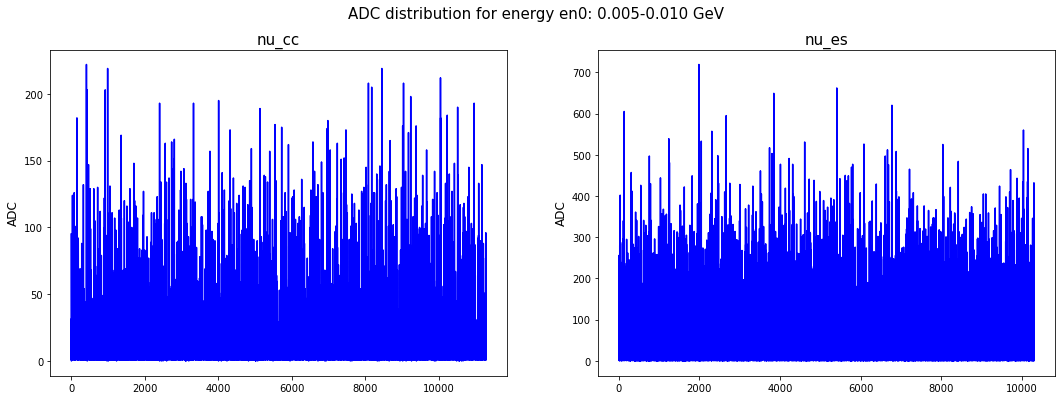

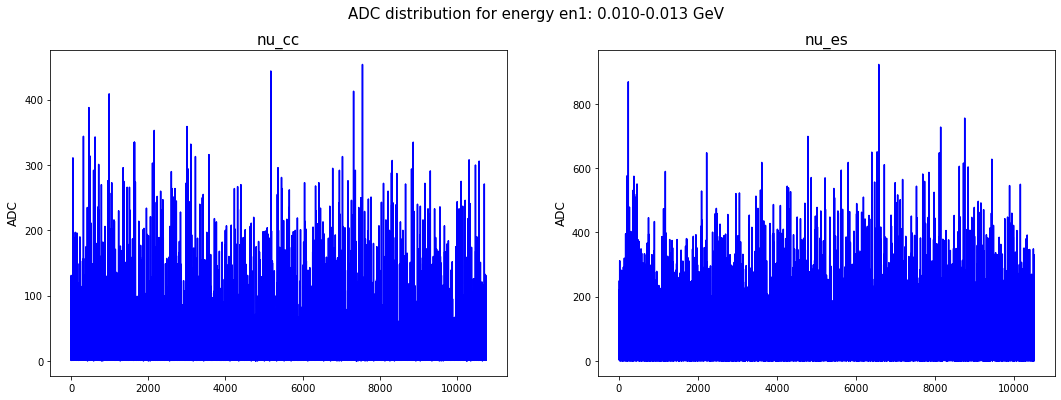

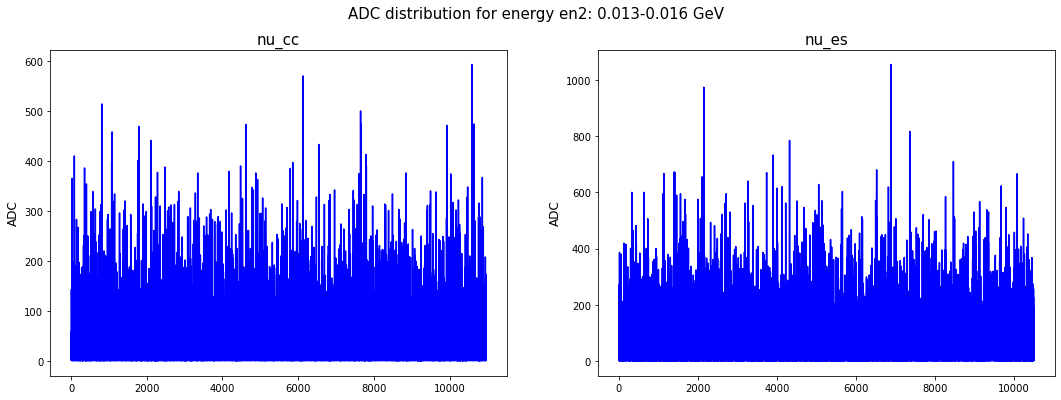

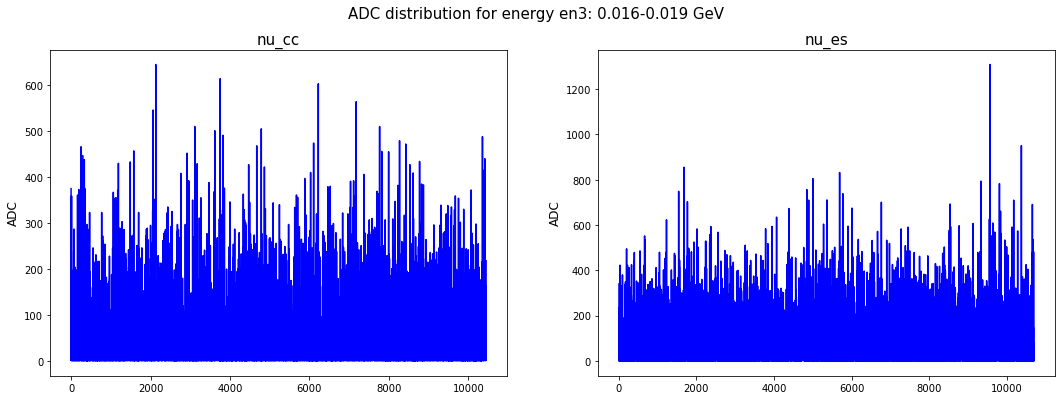

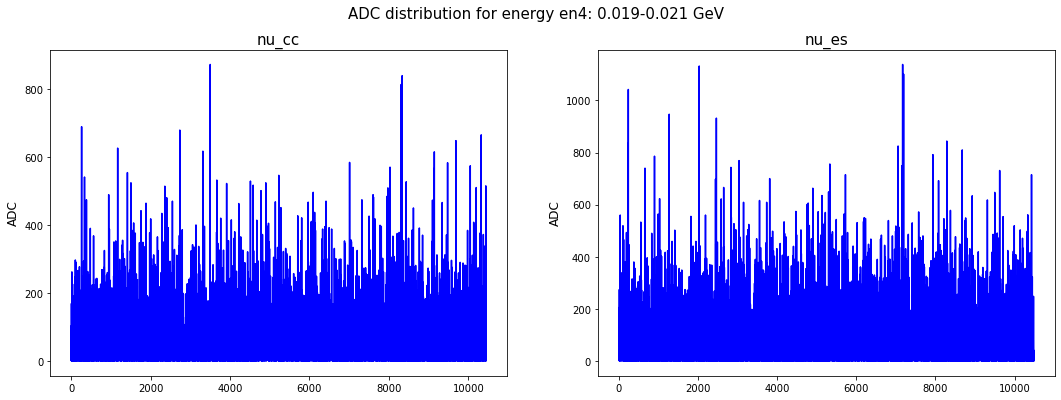

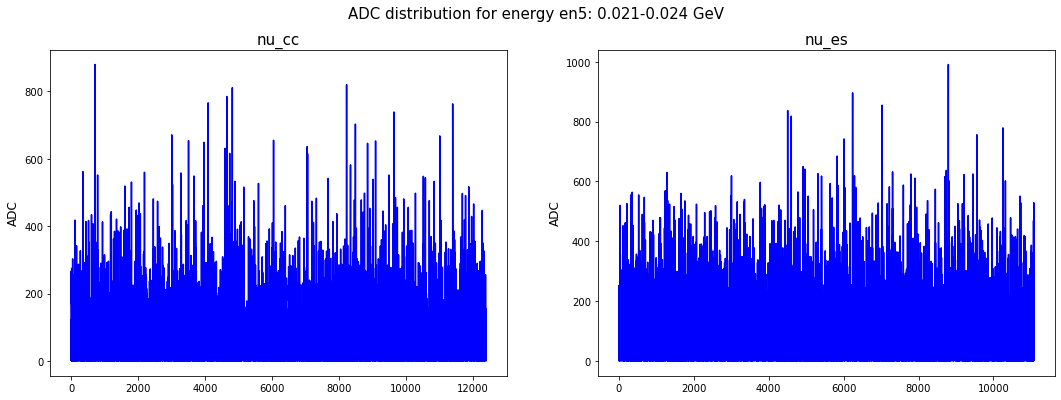

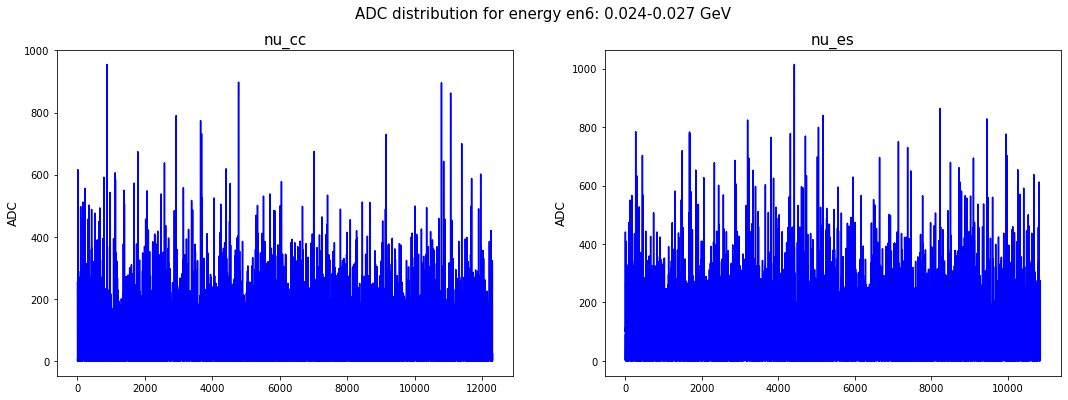

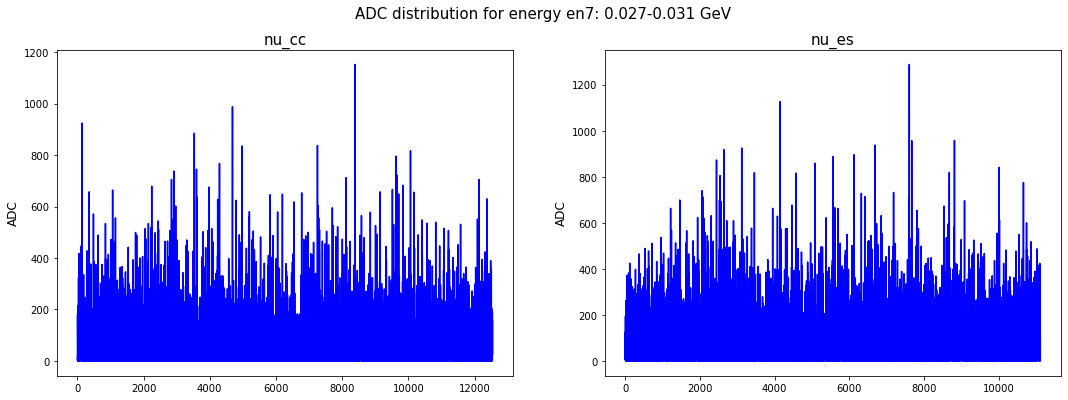

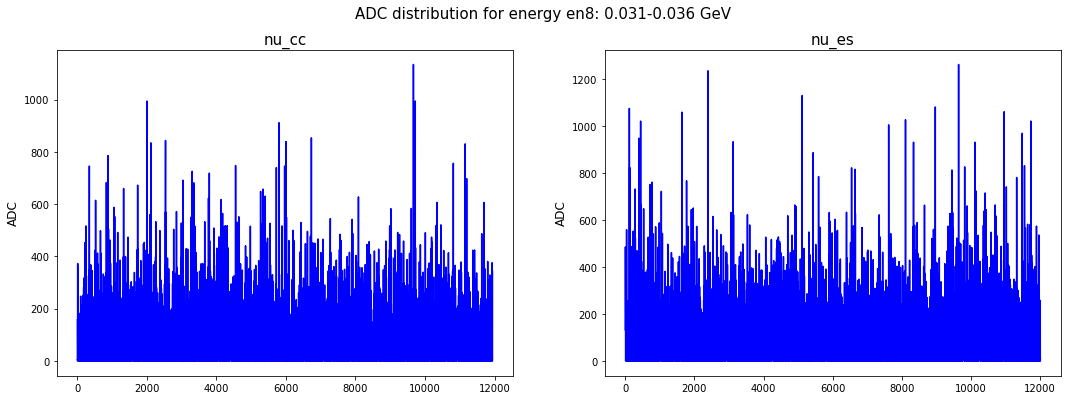

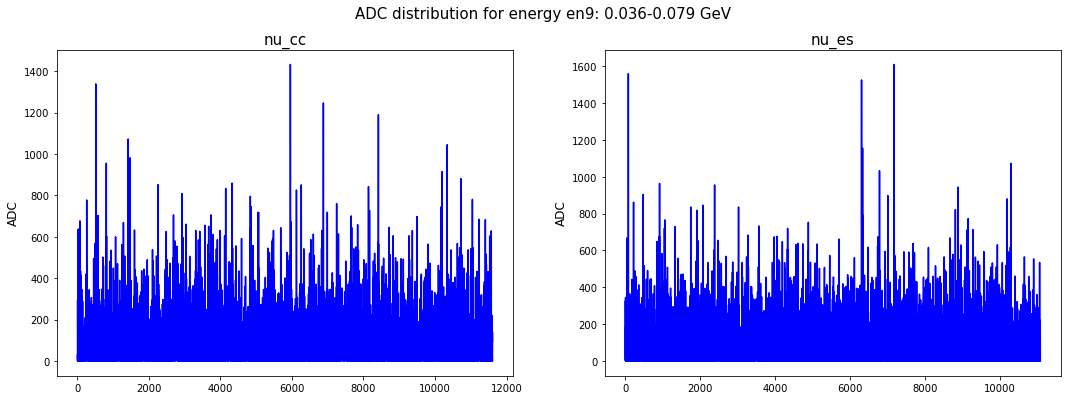

In [44]:
for i in range(10):
    make_plot(path_cc, path_es, "en"+str(i))